In [113]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt


In [139]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')

In [140]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [142]:
df['Gender'] = df['Gender'].astype("category")
df['Product'] = df['Product'].astype("category")
df['MaritalStatus'] = df['MaritalStatus'].astype("category")


[Text(0, 0, '76'), Text(0, 0, '104')]

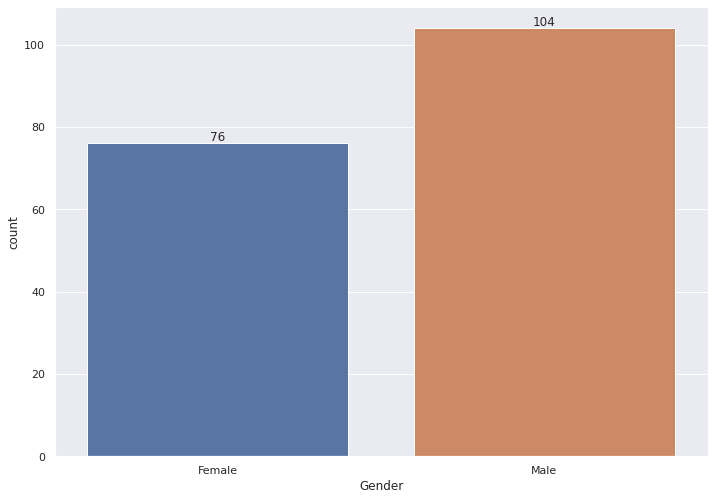

In [143]:
ax=sns.countplot(data=df,x=df['Gender'])
ax.bar_label(ax.containers[0])

[Text(0, 0, '80'), Text(0, 0, '60'), Text(0, 0, '40')]

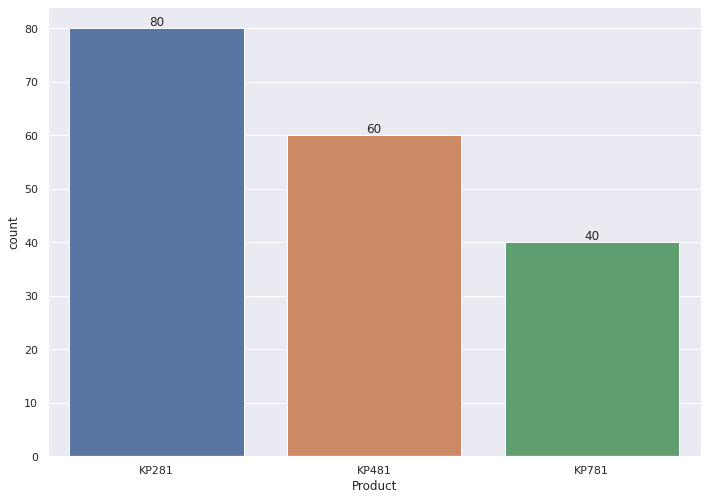

In [144]:
ax=sns.countplot(data=df,x=df['Product'])
ax.bar_label(ax.containers[0])

[Text(0, 0, '107'), Text(0, 0, '73')]

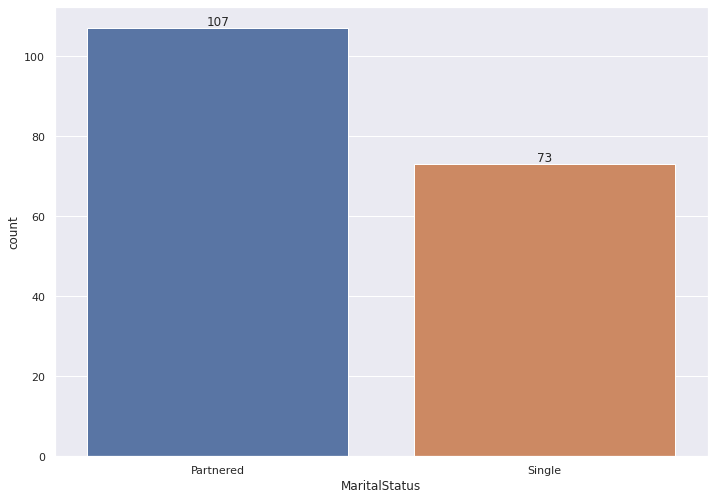

In [145]:
ax=sns.countplot(data=df,x=df['MaritalStatus'])
ax.bar_label(ax.containers[0])

In [146]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [147]:
#Huge difference in income for customers who purchase treadmills. Ranging between USD 29562 to 104581

<AxesSubplot:xlabel='Age'>

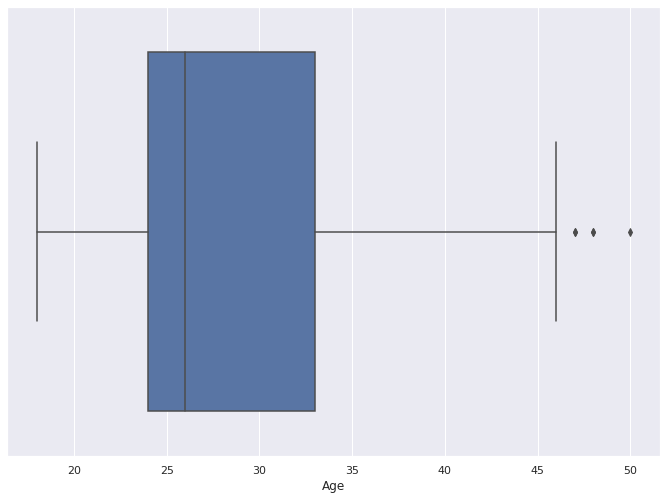

In [148]:
sns.boxplot(data=df,x=df['Age'])


<AxesSubplot:xlabel='Income'>

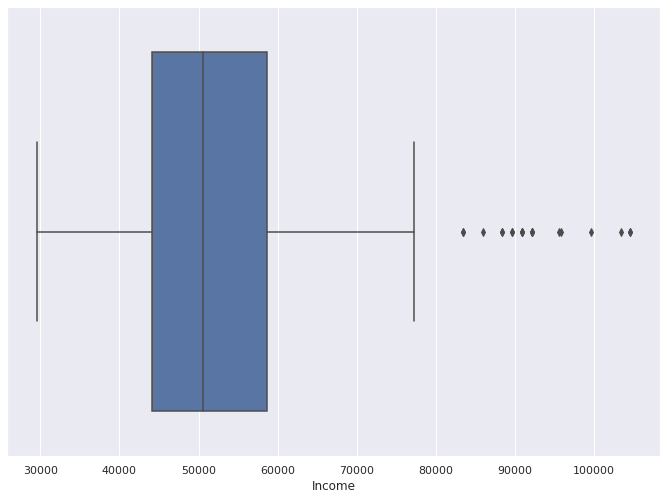

In [149]:
sns.boxplot(data=df,x=df['Income'])

<AxesSubplot:xlabel='Education'>

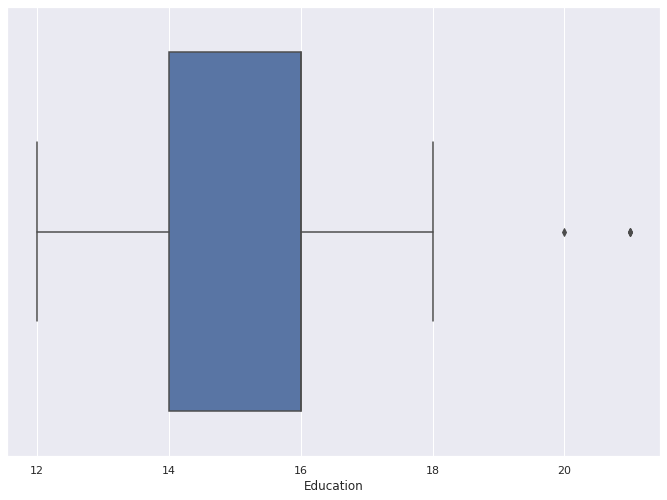

In [150]:
sns.boxplot(data=df,x=df['Education'])

<AxesSubplot:xlabel='Usage'>

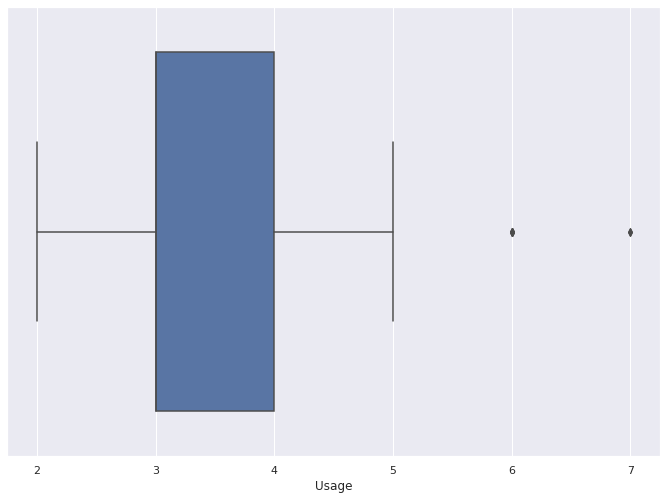

In [151]:
sns.boxplot(data=df,x=df['Usage'])

<AxesSubplot:xlabel='Fitness'>

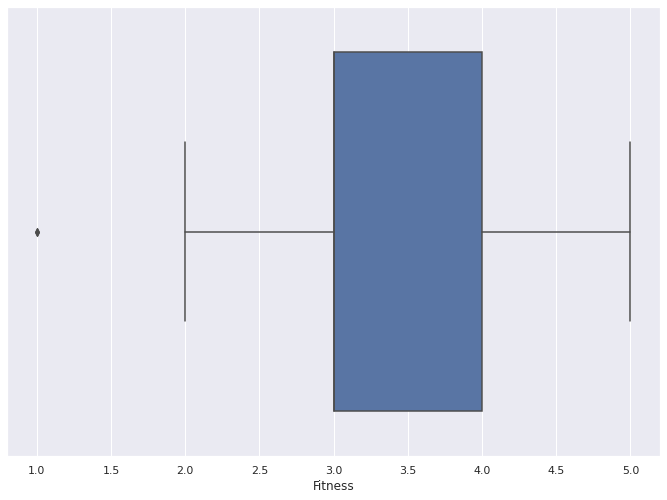

In [152]:
sns.boxplot(data=df,x=df['Fitness'])

<AxesSubplot:xlabel='Miles'>

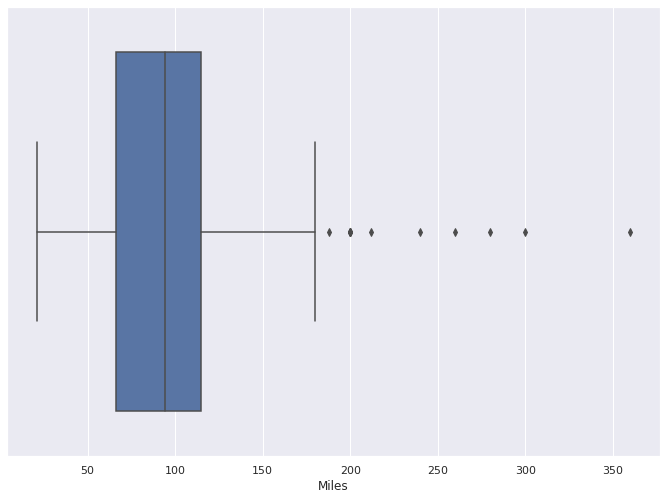

In [153]:
sns.boxplot(data=df,x=df['Miles'])

[Text(0, 0, '48'), Text(0, 0, '36'), Text(0, 0, '23')]

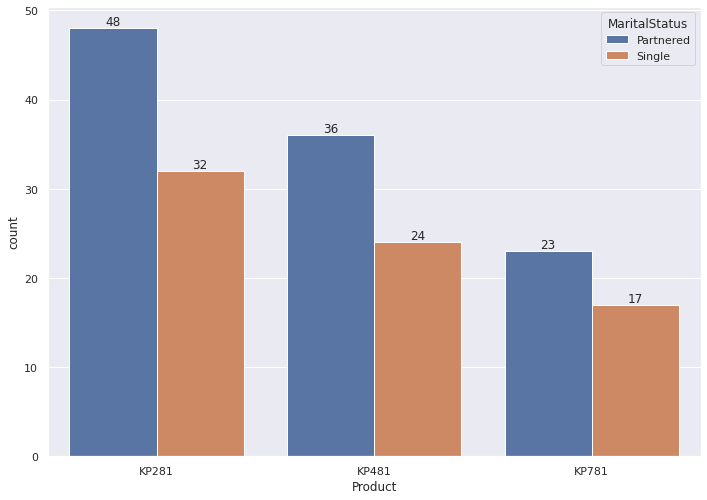

In [154]:
ax=sns.countplot(data=df,x=df['Product'], hue=df['MaritalStatus'])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[0])

<AxesSubplot:xlabel='Age', ylabel='Count'>

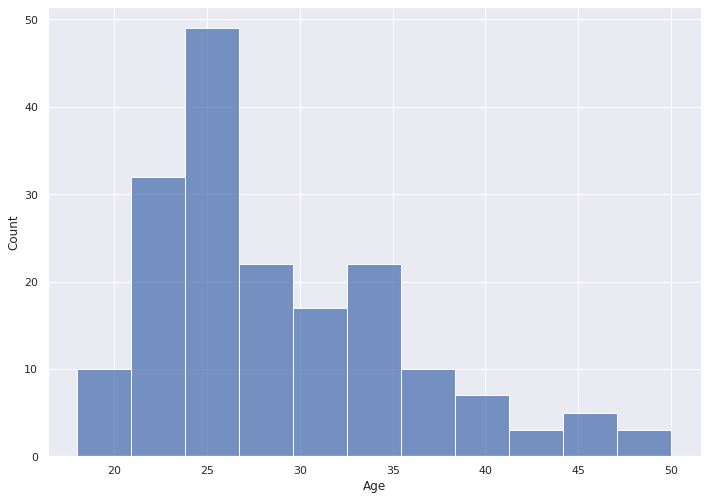

In [155]:
sns.histplot(data=df,x=df['Age'])

In [156]:
df['Age'].min()

18

In [157]:
data_1=df[df['Product']=='KP281']
data_2=df[df['Product']=='KP481']
data_3=df[df['Product']=='KP781']

In [187]:
labels = ['Bottom 40%', 'Middle 40%', 'Top 20%']
# bin data based on range of possible values
df['Income_Range'] = pd.cut(df['Income'], [29000,59400,89800,105000], labels=labels)

age_labels = ['18-30','31-40','41-50']
# bin data based on range of possible values
df['Age_group'] = pd.cut(df['Age'], [17,30,40,50], labels=age_labels)


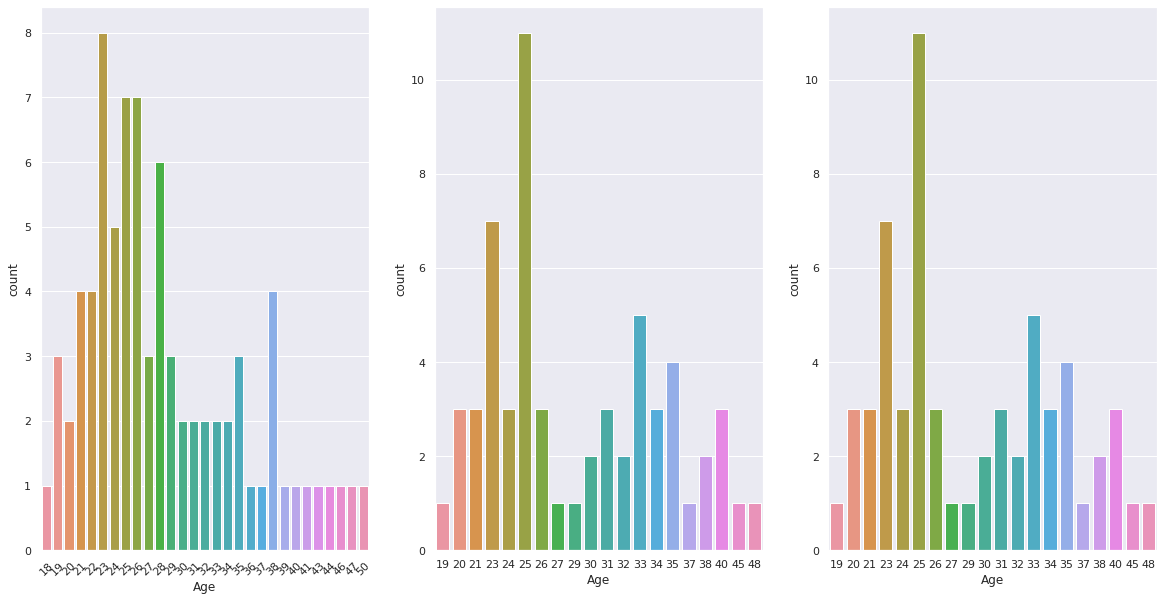

In [188]:
fig, ax =plt.subplots(1,3,figsize=(20, 10))
sns.countplot(data=data_1,x=data_1['Age'], ax=ax[0]).set_xticklabels(chart.get_xticklabels(), rotation=45)
sns.countplot(data=data_2,x=data_2['Age'], ax=ax[1])
sns.countplot(data=data_2,x=data_2['Age'], ax=ax[2])
fig.show()

<AxesSubplot:ylabel='Fitness'>

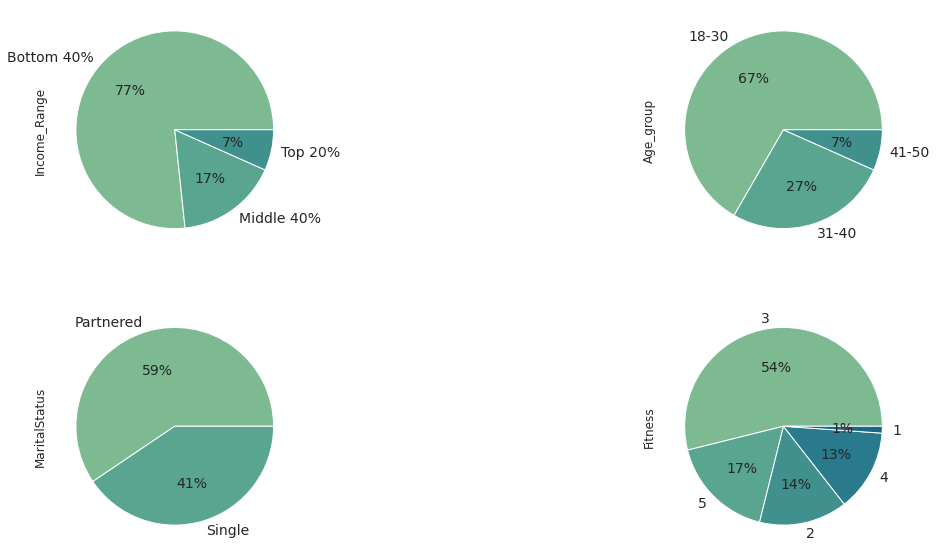

In [189]:
fig, ax =plt.subplots(2,2,figsize=(20, 10))
count = (df['Income_Range'].value_counts(normalize=True)*100)
count.plot.pie(colors = sns.color_palette("crest"),autopct='%0.0f%%',
                       textprops={'fontsize': 14,'family':"Comic Sans MS"},ax=ax[0][0])
count = (df['Age_group'].value_counts(normalize=True)*100)
count.plot.pie(colors = sns.color_palette("crest"),autopct='%0.0f%%',
                       textprops={'fontsize': 14,'family':"Comic Sans MS"},ax=ax[0][1])
count = (df['MaritalStatus'].value_counts(normalize=True)*100)
count.plot.pie(colors = sns.color_palette("crest"),autopct='%0.0f%%',
                       textprops={'fontsize': 14,'family':"Comic Sans MS"},ax=ax[1][0])
count = (df['Fitness'].value_counts(normalize=True)*100)
count.plot.pie(colors = sns.color_palette("crest"),autopct='%0.0f%%',
                       textprops={'fontsize': 14,'family':"Comic Sans MS"},ax=ax[1][1])


In [190]:
# Inferences
# 83% of treadmills are bought by customers with incomes between USD dollars 35000-60000, and USD dollars 60,000-85000.
# 93% of treadmills are purchased by customers aged 18 to 40.
# The treadmills are more likely to be purchased by married people
# Model KP281 is the best-selling product
# Customer with fitness level 3 buy major chuck of treadmills. (54%)

In [191]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

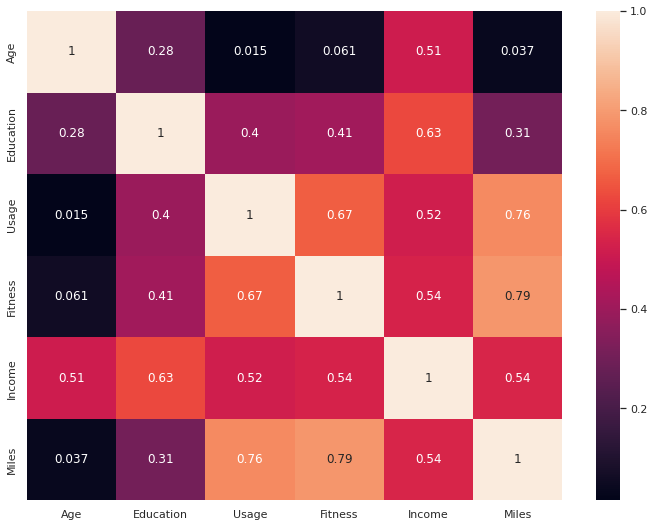

In [192]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,annot=True);


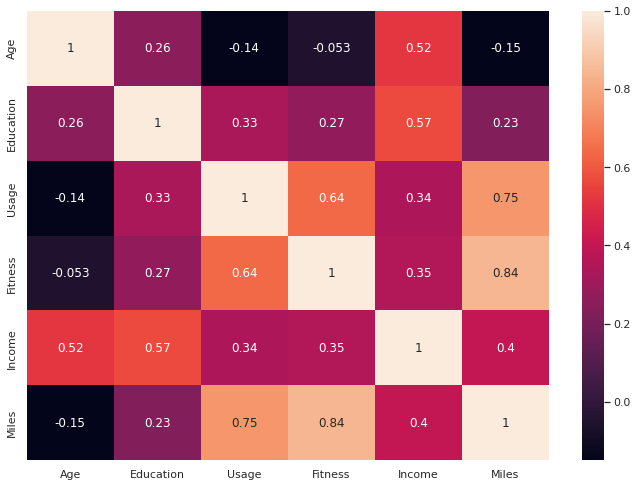

In [193]:
corrmat = df[df['Gender']=='Female'].corr()
sns.heatmap(corrmat,annot=True);

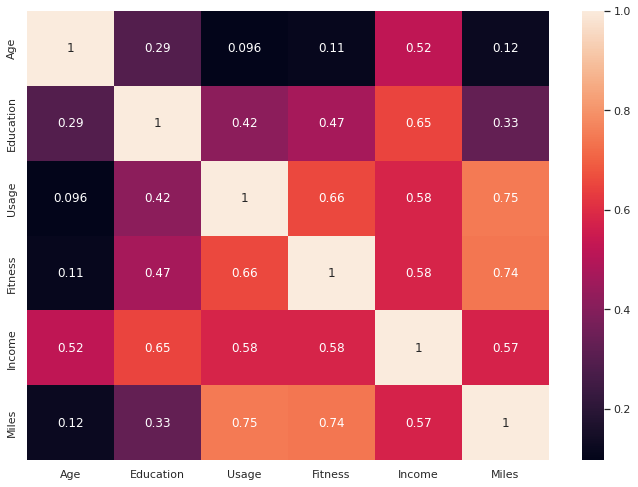

In [194]:
corrmat = df[df['Gender']=='Male'].corr()
sns.heatmap(corrmat,annot=True);

In [195]:
#Inference:
#In case of gender ,women's are fitness are more correlated to the miles. 
# Miles and Fitness and Miles and Usage are highly correlated, which means if a customer's fitness level is high they use more treadmills.
# Income and education show a strong correlation. High-income and highly educated people prefer high-end models (TM798), as mentioned during Bivariant analysis of Categorical variables.
# There is no corelation between Usage & Age or Fitness & Age which mean Age should not be barrier to use treadmills or specific model of treadmills.

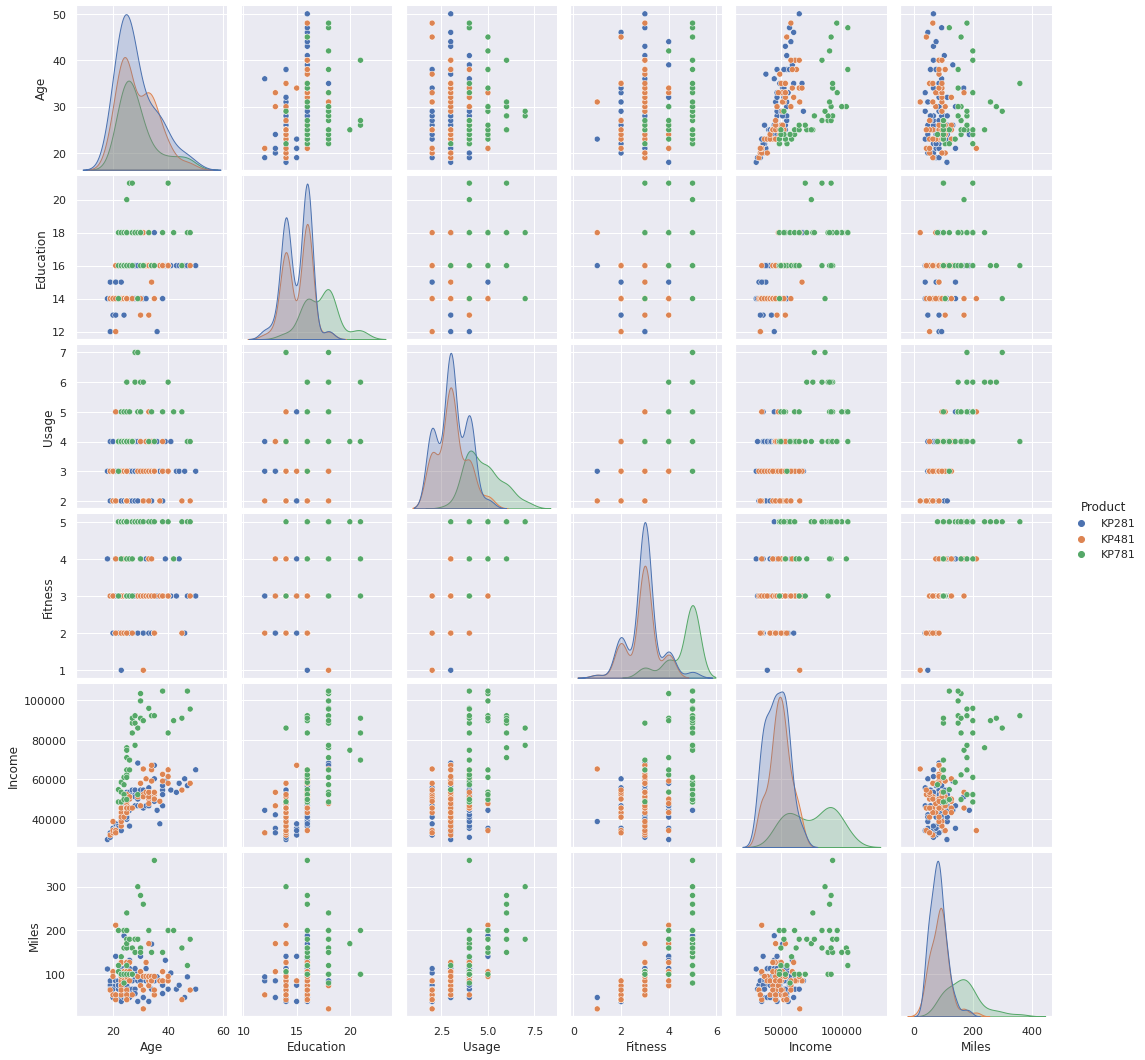

In [196]:
sns.pairplot(data=df,hue='Product')

In [210]:
# cross tab for Income_Range

In [198]:
pd.crosstab(index=df['Product'], columns=[df['Income_Range']],margins=True) 

Income_Range,Bottom 40%,Middle 40%,Top 20%,All
Product,,,,
KP281,74,6,0,80
KP481,53,7,0,60
KP781,11,17,12,40
All,138,30,12,180


In [199]:
# Percentage of a Top 20% customer purchasing a treadmill                (Marginal Probability)
# Sum of the treadmill purchased by Top 20% customer by total no. of customers.
round(12/180,2)*100


7.000000000000001

In [200]:
# Percentage of a Top 20% customer purchasing KP781 treadmill       (Joint Probability)
# Sum of the treadmill with model KP781 purchased by Top 20% customer by total no. of customers.
round(12/180,2)*100


7.000000000000001

In [203]:
# Percentage of customer with Top 20% salary buying treadmill given that Product is KP781    (Conditional Probability)
round(12/12,2)*100

100.0

In [ ]:
# Cross tab for Age_group

In [201]:
pd.crosstab(index=df['Product'], columns=[df['Age_group']],margins=True) 

Age_group,18-30,31-40,41-50,All
Product,,,,
KP281,55,19,6,80
KP481,35,23,2,60
KP781,30,6,4,40
All,120,48,12,180


In [204]:
# Percentage of a 18-30 years old customer purchasing a treadmill                (Marginal Probability)
# Sum of the treadmill purchased by 41-50 years old customer by total no. of customers.
round(120/180,2)*100


67.0

In [ ]:
#Cross Tab for MaritalStatus

In [182]:
pd.crosstab(index=df['Product'], columns=[df['MaritalStatus']],margins=True) 

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [205]:
# Percentage of a Partnered customer purchasing a treadmill                (Marginal Probability)
# Sum of the treadmill purchased by Partnered customer by total no. of customers.
round(107/180,2)*100

59.0

In [ ]:
#Cross Tab for Fitness

In [206]:
pd.crosstab(index=df['Product'], columns=[df['Fitness']],margins=True) 

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


In [207]:
# Percentage of a level 5 customer purchasing a treadmill                (Marginal Probability)
# Sum of the treadmill purchased by Partnered customer by total no. of customers.
round(31/180,2)*100

17.0

In [208]:
# Percentage of a customer with Fitness Level 5 purchasing KP781 treadmill
prob = round((29/180),2)
pct = round(prob*100,2)
pct


16.0

In [209]:
# percentage of customer having fitness level 5 buying KP781
prob = round((29/31),2)
pct = round(prob*100,2)
pct

94.0

In [61]:
#Number of male and female buying KP781 are :

df[df['Product']=='KP781']['Gender'].value_counts()

Male      33
Female     7
Name: Gender, dtype: int64

In [66]:
#Total Number of people buying KP781 are :

df['Product'].value_counts()[2]

40

In [211]:
#probability of male buying a KP781 is:

df[df['Product']=='KP781']['Gender'].value_counts()[0]/df['Product'].value_counts()[2]

0.825

In [ ]:
#Inference :

# 1.Probability of male buying KP781 is much higher than women i.e 82%
# 2.Probabiltiy of a person having fitness level 5 are buying KP781 , almost all 
# 3.Maximum tredmill was bought buy customer having age range 18-30
# 4.All the customer having salary in top 20%, are buying KP781
# 5.Customer having salary in bottom 40% are buying maximum tredmills



In [212]:
#Recommendations:
# 1.The customers that are  of low salary but, still they are buying the max treadmills , so our focus should be these customers .
# 2.The most selling treadmill is KP281 whis is popular amongst the low salaried cusomers , so this treadmill can be marked as the cost efficient & shold be prioritized more.
# 3.We can run offers on KP281 treadmill , as it is the most popular one to maximise its sales and maximize the profit allover.
# 4.We can prioritize the customer having age range btw 18-30 and can run offers for them as to make them as loyal customers.
# 5.Our focus could be the males having high salary , only  for the sales of KP781 only.
# 6.Also if a person is married , he/she is more likly to buy the product , so we have to focus on them as well.